In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
from typing import List, Callable
import matplotlib.pyplot as plt


In [20]:
def matrix_multiplication(m_1: np.ndarray, m_2: np.ndarray) -> np.ndarray:
    if m_1.shape[1] == m_2.shape[0]:
        m_3 = np.zeros((m_1.shape[0], m_2.shape[1]), np.int32)
        for fila in range(m_1.shape[0]):
            for col in range(m_2.shape[1]):
                for k in range(m_1.shape[1]):
                    m_3[fila][col] += m_1[fila][k] * m_2[k][col]
        return m_3
    else:
        return None


In [31]:
l_timings = []
for i in range(11):
    dim = i
    m = np.random.uniform(0., 1., (dim, dim))
    timings = %timeit - o - n 10 - r 5 - q matrix_multiplication(m, m)
    l_timings.append([dim, timings.best])


In [27]:
timings = np.array(l_timings)


In [28]:
def fit_func_2_times(timings: np.ndarray, func_2_fit: Callable):
    """Ajusta linealmente los valores de la funcion func_2_fit a
    los tiempos en timings.
    Esto es, calculamos valores a, b para que la funcion a*f(dim) + b
    se ajuste a los tiempos medidos.
    """
    if len(timings.shape) == 1:
        timings = timings.reshape(-1, 1)

    values = func_2_fit(timings[:, 0]).reshape(-1, 1)

    # normalizar timings
    times = timings[:, 1] / timings[0, 1]

    # ajustar a los valores en times un modelo lineal sobre los valores en values
    lr_m = LinearRegression()
    lr_m.fit(values, times)

    return lr_m.predict(values)


def func_2_fit(n):
    return n**3


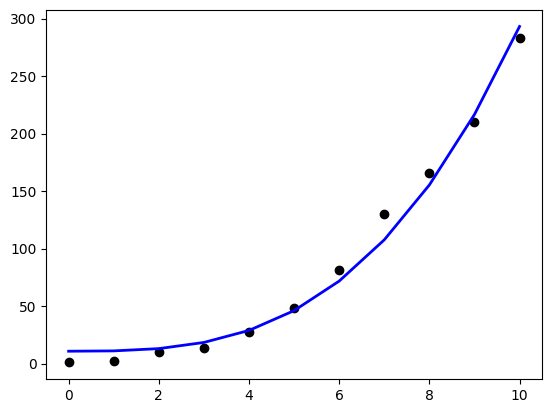

In [29]:
predict = fit_func_2_times(timings, func_2_fit)
eje_x = timings[:, 0]
eje_y = timings[:, 1] / timings[0, 1]


plt.scatter(eje_x, eje_y, color="black")
plt.plot(predict, color="blue", linewidth=2)

plt.show()
